<a href="https://colab.research.google.com/github/Belajargihh/Klasifikasi_Alat_Tulis/blob/main/klasifikasi_alat_tulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. Mount Google Drive (jalankan dulu ini)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 📚 Step 2: Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# ⚙️ Step 3: Konfigurasi
IMG_SIZE = (160, 160)
BATCH_SIZE = 128
EPOCHS = 50
DATA_DIR = '/content/drive/MyDrive/Alat_Tulis'  # Ganti sesuai path datasetmu
MODEL_PATH = '/content/drive/MyDrive/model_mobilenet_alat_tulis.h5'

In [4]:
# 🔄 Step 4: Image Augmentation & Data Loader
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [5]:
# 🧠 Step 5: Transfer Learning Model
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_accuracy', mode='max')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# 🚀 Step 6: Train Model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop, model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.2504 - loss: 2.1083 

8/8 ━━━━━━━━━━━━━━━━━━━━ 281s 36s/step - accuracy: 0.2525 - loss: 2.0896 - val_accuracy: 0.4083 - val_loss: 1.3287
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3001 - loss: 1.6018

8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step - accuracy: 0.3030 - loss: 1.5942 - val_accuracy: 0.5583 - val_loss: 1.0952
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4408 - loss: 1.3080

8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step - accuracy: 0.4444 - loss: 1.3022 - val_accuracy: 0.6583 - val_loss: 0.9488
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4636 - loss: 1.2142

8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.4677 - loss: 1.2061 - val_accuracy: 0.6875 - val_loss: 0.8415
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5743 - loss: 0.9982

8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - accuracy: 0.5766 - loss: 0.9959 - val_accuracy: 0.7083 - val_loss: 0.8257
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6201 - loss: 0.8967

8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.6226 - loss: 0.8955 - val_accuracy: 0.7375 - val_loss: 0.7133
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step - accuracy: 0.6604 - loss: 0.8542 - val_accuracy: 0.7125 - val_loss: 0.7017
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7102 - loss: 0.7675

8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.7087 - loss: 0.7678 - val_accuracy: 0.7625 - val_loss: 0.6435
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6782 - loss: 0.7674

8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.6812 - loss: 0.7624 - val_accuracy: 0.7875 - val_loss: 0.6355
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 8s/step - accuracy: 0.7501 - loss: 0.6713 - val_accuracy: 0.7708 - val_loss: 0.6225
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.7056 - loss: 0.6994 - val_accuracy: 0.7875 - val_loss: 0.5992
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.7541 - loss: 0.6306 - val_accuracy: 0.7667 - val_loss: 0.5820
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.7494 - loss: 0.6428 - val_accuracy: 0.7875 - val_loss: 0.5862
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.7822 - loss: 0.5697 - val_accuracy: 0.7583 - val_loss: 0.5667
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.7608 - loss: 0.5924 - val_accuracy: 0.7667 - val_loss: 0.5873
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.7814 - loss: 0.5564 - val_accuracy: 0.7875 - val_loss: 0.5593
Epoch 17/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 8s/step - accuracy: 0.7854 - loss: 0.5344 - val_accuracy: 0.7958 - val_loss: 0.5890
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.7926 - loss: 0.5421 - val_accuracy: 0.7750 - val_loss: 0.5777
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step - accuracy: 0.8035 - loss: 0.5425 - val_accuracy: 0.7708 - val_loss: 0.5804
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.7957 - loss: 0.5164 - val_accuracy: 0.7750 - val_loss: 0.5681
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.7989 - loss: 0.5184 - val_accuracy: 0.7750 - val_loss: 0.5728
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.8239 - loss: 0.4495 - val_accuracy: 0.7792 - val_loss: 0.5649
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.8152 - loss: 0.4886 - val_accuracy: 0.7667 - val_loss: 0.5535
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8350 - loss: 0.4180

8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.8335 - loss: 0.4228 - val_accuracy: 0.8125 - val_loss: 0.5166
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8144 - loss: 0.4562 - val_accuracy: 0.7958 - val_loss: 0.5279
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.8370 - loss: 0.4492 - val_accuracy: 0.8000 - val_loss: 0.5280
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8341 - loss: 0.4445 - val_accuracy: 0.7667 - val_loss: 0.5828
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8254 - loss: 0.4562 - val_accuracy: 0.7833 - val_loss: 0.5399
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8332 - loss: 0.4614 - val_accuracy: 0.7917 - val_loss: 0.5078
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.8388 - loss: 0.4144 - val_accuracy: 0.7792 - val_loss: 0.5456
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8411 - loss: 0.4285 - val_accuracy: 0.8083 - val_loss: 0.5043
Epoch 32/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8460 - loss: 0.3946 - val_accuracy: 0.8167 - val_loss: 0.5189
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.8654 - loss: 0.3972 - val_accuracy: 0.8083 - val_loss: 0.5134
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.8636 - loss: 0.3773 - val_accuracy: 0.7833 - val_loss: 0.4910
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.8437 - loss: 0.3811 - val_accuracy: 0.8000 - val_loss: 0.5334
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.8640 - loss: 0.3538 - val_accuracy: 0.7708 - val_loss: 0.5614
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.8405 - loss: 0.3838 - val_accuracy: 0.8083 - val_loss: 0.5245
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.8505 - loss: 0.3826 - val_accuracy: 0.8083 - val_loss: 0.5199
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.8613 - loss: 0.3434 - val_accuracy: 0.8000 - val_loss: 0.5666
Epoch 44/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8893 - loss: 0.3180 - val_accuracy: 0.8292 - val_loss: 0.5311
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.8702 - loss: 0.3377 - val_accuracy: 0.7875 - val_loss: 0.5152
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.8609 - loss: 0.3363 - val_accuracy: 0.7958 - val_loss: 0.5301
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.8706 - loss: 0.3463 - val_accuracy: 0.7958 - val_loss: 0.5609


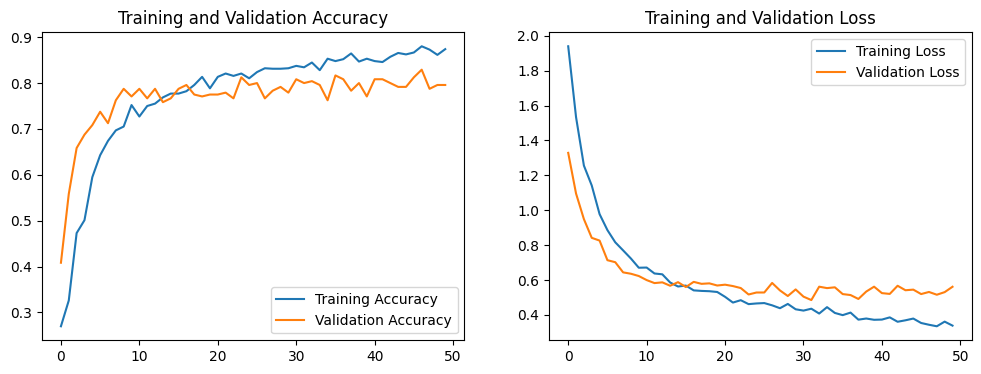

In [8]:
# 📊 Step 7: Plot Akurasi & Loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_training(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step


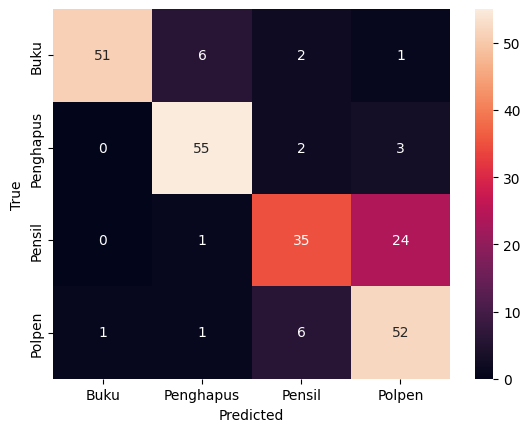

              precision    recall  f1-score   support

        Buku       0.98      0.85      0.91        60
   Penghapus       0.87      0.92      0.89        60
      Pensil       0.78      0.58      0.67        60
      Polpen       0.65      0.87      0.74        60

    accuracy                           0.80       240
   macro avg       0.82      0.80      0.80       240
weighted avg       0.82      0.80      0.80       240



In [9]:
# ✅ Step 8: Evaluasi Akhir
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=val_generator.class_indices,
            yticklabels=val_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(val_generator.classes, y_pred,
                            target_names=list(val_generator.class_indices.keys())))